In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml
import os
import pickle

dict_keys(['epoch', 'train_recon_error', 'train_topo_error', 'train_error', 'val_recon_error', 'val_topo_error', 'val_error'])


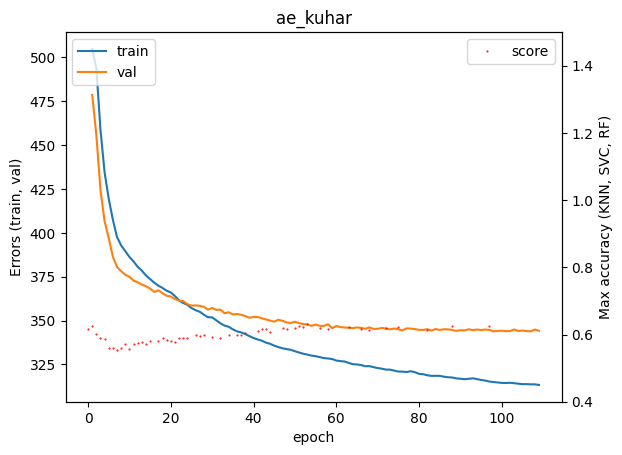

dict_keys(['epoch', 'train_recon_error', 'train_topo_error', 'train_error', 'val_recon_error', 'val_topo_error', 'val_error'])


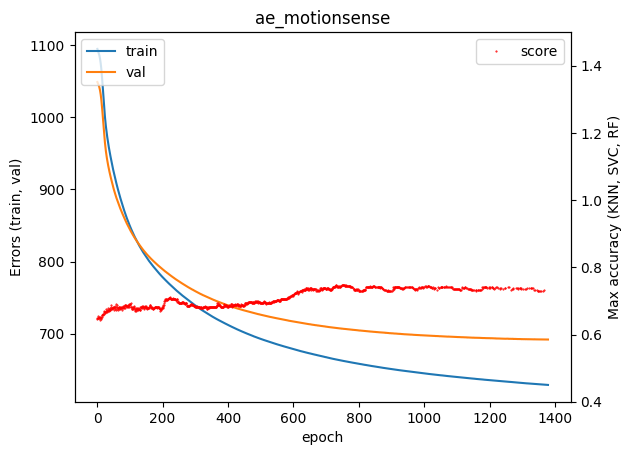

dict_keys(['epoch', 'train_recon_error', 'train_topo_error', 'train_error', 'val_recon_error', 'val_topo_error', 'val_error'])


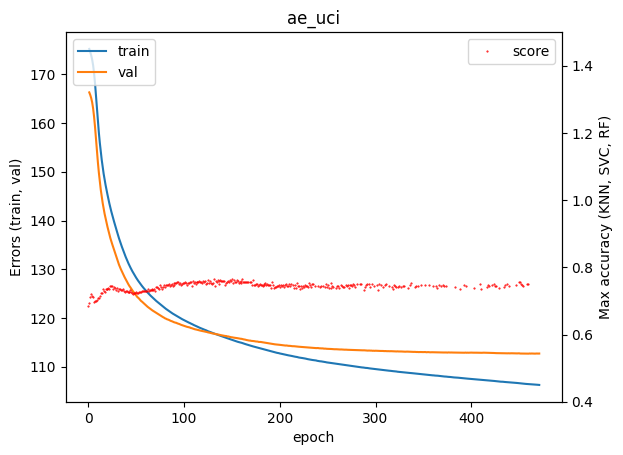

dict_keys(['epoch', 'train_recon_error', 'train_topo_error', 'train_error', 'val_recon_error', 'val_topo_error', 'val_error'])


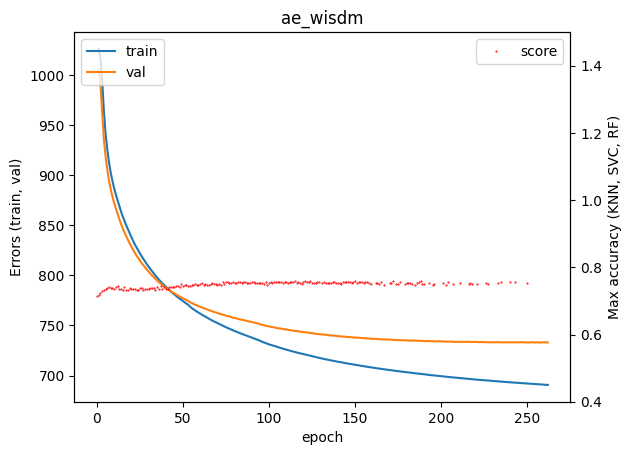

In [13]:
prefix_list = ['ae_kuhar', 'ae_motionsense', 'ae_uci', 'ae_wisdm']
for prefix in prefix_list:
    fig, ax1 = plt.subplots()
    # ax1.set_ylim((200, 550))
    ax2 = ax1.twinx()
    # Read history file:

    history_filename = f'../execute_once_experiments/TV_best_ht_saving_checkpoints/files/TV_sb_gradual_{prefix}_25_history.sml'
    with open(history_filename, 'rb') as f:
        history = pickle.load(f)
        print(history.keys())
        ax1.set_title(prefix)
        ax1.plot(history['epoch'], history['train_recon_error'], label='train')
        ax1.plot(history['epoch'], history['val_recon_error'], label='val')
        ax1.legend(loc='upper left')
        ax1.set_xlabel('epoch')
        ax1.set_ylabel('Errors (train, val)')
        # plt.ylim(0, 1)
    data_x = []
    data_y = []
    for file in os.listdir(f'../execute_once_experiments/TV_sb_gradual_{prefix}/scores/'):
        epoch = file.split('.')[0].split('_')[-1]    
        with open(f'../execute_once_experiments/TV_sb_gradual_{prefix}/scores/{file}') as f:
            score = yaml.load(f, Loader=yaml.FullLoader)
            data_x.append(int(epoch))
            data_y.append(score['score'])
            # ax2.plot(int(epoch), score['score'], 'r.')
    ax2.plot(data_x, data_y, 'r.', label='score', markersize=1)
    ax2.set_ylim((0.4, 1.5))
    ax2.set_ylabel('Max accuracy (KNN, SVC, RF)')
    ax2.legend(loc='upper right')
    plt.show()
    # plt.savefig(f'{prefix}_gradual.png', transparent=True)